# Phishing Domain Detection Using Machine Learning

## Problem Statement

Phishing attacks are a major cybersecurity threat causing financial and data loss. The objective of this project is to build and evaluate machine learning models that can accurately classify whether a given website is phishing or legitimate based on extracted URL and domain-based features.


## About the Dataset

The dataset used in this project was downloaded from Kaggle (https://www.kaggle.com/datasets/michellevp/dataset-phishing-domain-detection-cybersecurity) and focuses on detecting phishing domains in a cybersecurity context. It contains 129,698 instances and 112 feature variables extracted from domain URLs. The target column, phishing, is a binary label where 1 represents a phishing URL and 0 represents a legitimate URL.

### Install and import the required libraries

In [4]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [23]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Legitimate', 'Phishing']); ax.yaxis.set_ticklabels(['Legitimate', 'Phishing']) 
    plt.show() 

### Load the data

In [6]:
url=r"C:\Users\SUGANYA\Downloads\dataset_cybersecurity_michelle.csv"
df = pd.read_csv(url)
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,...,2,2,5,292,0,-1,0,0,0,1
1,2,5,4,2,0,0,0,0,0,0,...,2,4,2,52,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,2,2,0,298,1,1,0,0,0,0
3,1,1,0,2,0,0,0,0,0,0,...,1,2,5,1792,0,0,0,0,0,1
4,2,1,0,0,0,0,0,0,0,0,...,1,2,1,299,1,1,0,0,0,0


### EXPLORATORY DATA ANALYSIS

In [7]:
df['phishing'].value_counts(normalize=True)

phishing
0    0.597897
1    0.402103
Name: proportion, dtype: float64

In [8]:
df.shape


(129698, 112)

In [9]:
df['phishing'].value_counts()

phishing
0    77546
1    52152
Name: count, dtype: int64

In [10]:
df.isnull().sum().sum()


np.int64(0)

In [11]:
df.duplicated().sum()

np.int64(42489)

In [12]:
df_clean = df.drop_duplicates()

print("Original shape:", df.shape)
print("After removing duplicates:", df_clean.shape)

Original shape: (129698, 112)
After removing duplicates: (87209, 112)


In [13]:
df_clean['phishing'].value_counts()
df_clean['phishing'].value_counts(normalize=True)

phishing
0    0.6503
1    0.3497
Name: proportion, dtype: float64

Duplicates were removed to prevent bias and data leakage.

In [14]:
df = df_clean.copy()

## MODEL DEVELOPEMENT

In [15]:
X=df.drop('phishing', axis=1)
Y=df['phishing']

In [16]:
X.shape  # (17442, 111)
Y.shape 

(87209,)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### LOGISTIC REGRESSION 

In [18]:
lr=LogisticRegression(max_iter=1000,
    class_weight='balanced',
    n_jobs=-1)
lr.fit(X_train, Y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [19]:
Y_pred = lr.predict(X_test)
Y_prob = lr.predict_proba(X_test)[:, 1]




In [20]:
print(confusion_matrix(Y_test, Y_pred))


[[10026  1317]
 [  307  5792]]


In [21]:
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.97      0.88      0.93     11343
           1       0.81      0.95      0.88      6099

    accuracy                           0.91     17442
   macro avg       0.89      0.92      0.90     17442
weighted avg       0.92      0.91      0.91     17442



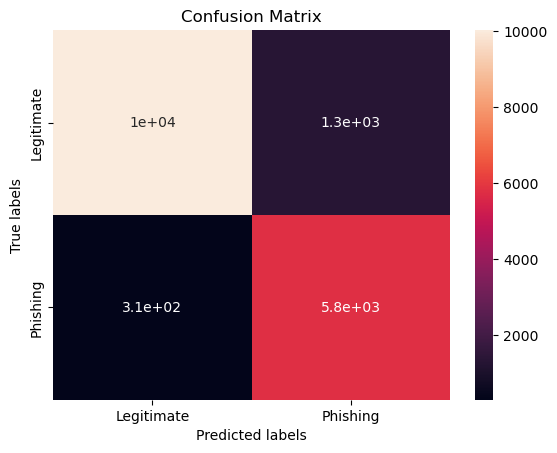

In [24]:
plot_confusion_matrix(Y_test, Y_pred)

In [26]:
print("ROC-AUC:", roc_auc_score(Y_test, Y_prob))

ROC-AUC: 0.9683020285481163


In [40]:
thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    Y_pred_thresh = (Y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_thresh).ravel()
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    print(f"Threshold={t:.2f} | Recall={recall:.3f} | Precision={precision:.3f}")

Threshold=0.10 | Recall=0.980 | Precision=0.727
Threshold=0.15 | Recall=0.976 | Precision=0.741
Threshold=0.20 | Recall=0.975 | Precision=0.754
Threshold=0.25 | Recall=0.974 | Precision=0.761
Threshold=0.30 | Recall=0.968 | Precision=0.771
Threshold=0.35 | Recall=0.965 | Precision=0.781
Threshold=0.40 | Recall=0.960 | Precision=0.790
Threshold=0.45 | Recall=0.956 | Precision=0.802
Threshold=0.50 | Recall=0.950 | Precision=0.815
Threshold=0.55 | Recall=0.942 | Precision=0.825
Threshold=0.60 | Recall=0.931 | Precision=0.837
Threshold=0.65 | Recall=0.910 | Precision=0.854
Threshold=0.70 | Recall=0.883 | Precision=0.871
Threshold=0.75 | Recall=0.843 | Precision=0.889
Threshold=0.80 | Recall=0.778 | Precision=0.907
Threshold=0.85 | Recall=0.700 | Precision=0.925


### RANDOM FOREST

In [27]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [28]:
Y_pred_rf = rf.predict(X_test)
Y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(confusion_matrix(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))
print("ROC-AUC:", roc_auc_score(Y_test, Y_prob_rf))

[[10954   389]
 [  217  5882]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     11343
           1       0.94      0.96      0.95      6099

    accuracy                           0.97     17442
   macro avg       0.96      0.97      0.96     17442
weighted avg       0.97      0.97      0.97     17442

ROC-AUC: 0.9944943664193602


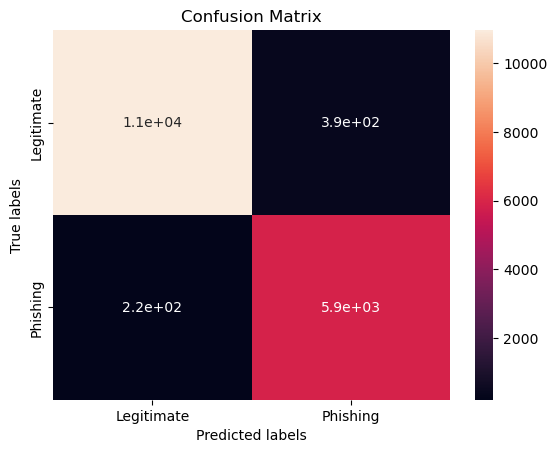

In [29]:
plot_confusion_matrix(Y_test, Y_pred_rf)

In [30]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

directory_length             0.076892
qty_slash_url                0.066345
time_domain_activation       0.054849
qty_hashtag_file             0.037299
qty_slash_directory          0.033354
qty_dot_file                 0.031029
file_length                  0.030245
qty_exclamation_directory    0.027762
qty_tilde_directory          0.027082
qty_and_directory            0.027027
dtype: float64